In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [23]:
dataset = pd.read_csv("data_seawulf.csv")
dataset.columns = ((dataset.columns.str).replace("^ ","")).str.replace(" $","")
dataset

,Kernel,Architechture,Vendor,CPUs,Cycle,L1,L2,L3,RAM),Threads,...,addInt,addFloat,mulInt,mulFloat,assignInt,assignFloat,addAssignInt,addAssignFloat,postIncInt,Time
0,kernel_100_100_1_5_9_0,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,0,0,0,0,0,0,1,0.001
1,kernel_100_100_1_5_9_1,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,200,0,0,0,300,0,0,0,101,0.001
2,kernel_100_100_1_5_9_2,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,603,0,703,0,0,0,101,0.001
3,kernel_100_100_1_5_9_3,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,200,0,603,0,1003,0,0,0,201,0.001
4,kernel_100_100_1_5_9_4,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,0,0,0,100,0,1007,0,101,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138363,kernel_600_600_1_5_9_123,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,1200,1200,3603,3603,8403,4803,0,6007,4801,0.057
138364,kernel_600_600_1_5_9_124,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,1200,0,3603,3000,4803,6007,6007,4201,0.061
138365,kernel_600_600_1_5_9_125,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,1200,1200,0,3603,4800,4803,6007,6007,4801,0.061
138366,kernel_600_600_1_5_9_126,x86_64,Intel,40,1000,640,20480,27648,187.57,28,...,0,1200,3603,3603,7203,4803,6007,6007,4801,0.065


In [24]:
scaled_features = dataset.copy()
col_names = ['CPUs','Cycle','L1','L2','L3','RAM)','Threads','Iterations','varDecl','refExpr','intLiteral','floatLiteral','addInt','addFloat','mulInt','mulFloat','assignInt','assignFloat','addAssignInt','addAssignFloat','postIncInt','Time']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#scaled_features
x=scaled_features.iloc[:,3:24].values
y=scaled_features.iloc[:,24:].values
st_x = StandardScaler()
st_y = StandardScaler()
X = st_x.fit_transform(x)
Y = st_y.fit_transform(y)

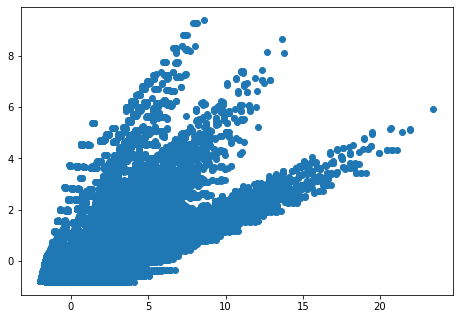

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pca = sklearnPCA(n_components=1) 
transformed = pd.DataFrame(pca.fit_transform(x))
#transformed
ax.scatter(transformed,y)

In [26]:
%%time
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(transformed,y.flatten())

CPU times: user 10min 18s, sys: 1.36 s, total: 10min 19s
Wall time: 10min 19s


SVR()

In [27]:
%%time
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(transformed,y.flatten())

CPU times: user 5min 54s, sys: 470 ms, total: 5min 54s
Wall time: 5min 54s


SVR(kernel='linear')

In [36]:
%%time
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(transformed,Y.flatten())

CPU times: user 38min 24s, sys: 7.1 s, total: 38min 31s
Wall time: 38min 35s


SVR(kernel='poly')

In [17]:
%%time
prediction_rbf = regressor_rbf.predict(transformed)

CPU times: user 2min 10s, sys: 232 ms, total: 2min 11s
Wall time: 2min 11s


In [18]:
%%time
prediction_linear = regressor_linear.predict(transformed)

CPU times: user 1min 20s, sys: 168 ms, total: 1min 20s
Wall time: 10min 13s


In [37]:
%%time
prediction_poly = regressor_poly.predict(transformed)

CPU times: user 1min 22s, sys: 289 ms, total: 1min 23s
Wall time: 1min 23s


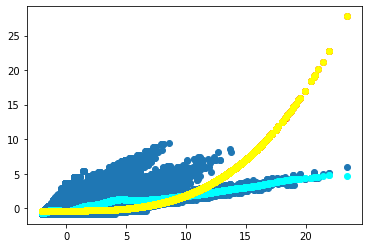

In [38]:
plt.scatter(transformed,Y.flatten())
plt.scatter(transformed, prediction_rbf, color='cyan')
plt.scatter(transformed, prediction_linear, color='red')
plt.scatter(transformed, prediction_poly, color='yellow')

In [39]:
mse_rbf=mean_squared_error(Y, prediction_rbf)
rmse_rbf=np.sqrt(mse_rbf)
mse_linear=mean_squared_error(Y, prediction_linear)
rmse_linear=np.sqrt(mse_linear)
mse_poly=mean_squared_error(Y, prediction_poly)
rmse_poly=np.sqrt(mse_poly)
print(f'rbf = {rmse_rbf}, linear = {rmse_linear}, poly = {rmse_poly}')

rbf = 0.7291922210752564, linear = 0.9752908956868201, poly = 0.9753367479637115
